# Exploratory Data Analysis

In [1]:
import json
import pandas as pd
import datetime
import glob
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import matplotlib.dates as md
from sklearn.model_selection import train_test_split

In [2]:
analysis = pd.read_csv(r'C:\Users\leaba\Documents\MyFitbitData/analysis.csv')

In [3]:
analysis['duration of sleep in hours'] = analysis['duration'] / 3600000
#analysis = analysis.drop('duration', 1) #where 1 is the axis number (0 for rows and 1 for columns.)

In [4]:
analysis.head()

,Date,overall_score,resting_heart_rate,startTime,duration,minutesAsleep,minutesAwake,timeInBed,efficiency,levels.summary.deep.minutes,levels.summary.wake.minutes,levels.summary.light.minutes,levels.summary.rem.minutes,duration of sleep in hours
0,2021-03-10,70.5,58.310559,0,2.238950e+07,330.242236,42.891304,373.158385,79.273292,51.770186,42.732919,203.596273,71.798137,6.219306
1,2021-03-11,70.5,58.310559,0,2.238950e+07,330.242236,42.891304,373.158385,79.273292,51.770186,42.732919,203.596273,71.798137,6.219306
2,2021-03-12,70.5,58.310559,0,2.238950e+07,330.242236,42.891304,373.158385,79.273292,51.770186,42.732919,203.596273,71.798137,6.219306
3,2021-03-13,70.5,58.310559,0,2.238950e+07,330.242236,42.891304,373.158385,79.273292,51.770186,42.732919,203.596273,71.798137,6.219306
4,2021-03-14,70.5,58.310559,0,2.238950e+07,330.242236,42.891304,373.158385,79.273292,51.770186,42.732919,203.596273,71.798137,6.219306


## Duration of Sleep in Hours
As of now, "duration" is displayed in miliseconds - as that is not "user-friendly", I decided to display it in hours instead.

In [5]:
analysis['duration_h'] = analysis['duration'] / 3600000 #get duration in hours

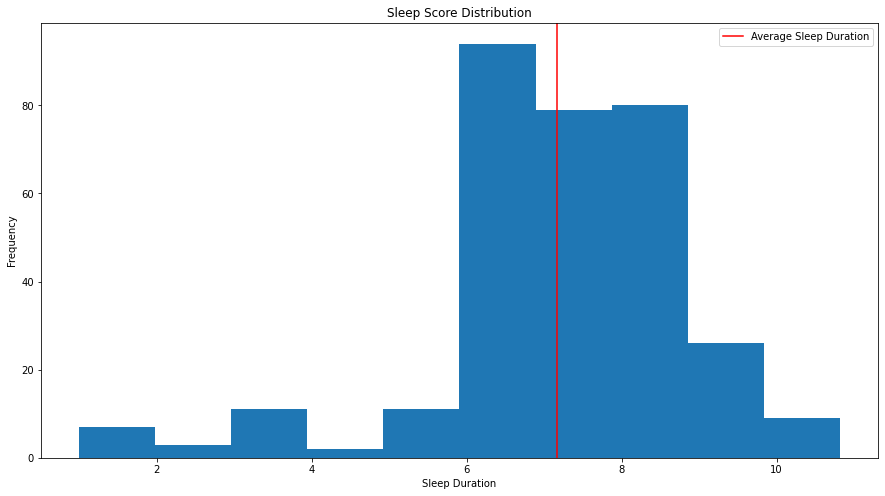

In [6]:
plt.figure(figsize=(15,8))
plt.hist(analysis.duration_h)
plt.axvline(analysis.duration_h.mean(), color='r', label='Average Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.title('Sleep Score Distribution')
plt.legend()

The histogram shows a wide distribution of the average sleep duration. Hypotheses could be 1) that user napped or 2) that she woke up a lot during the night. Let's explore the rows with the duration in hours, less than 6h:

In [7]:
show = analysis[analysis.duration_h < 6]
print(show)

           Date  overall_score  resting_heart_rate                startTime  \
69   2021-05-17           81.0                71.0  2021-05-16T22:45:00.000   
80   2021-05-28           74.0                72.0  2021-05-28T03:42:00.000   
81   2021-05-28           74.0                72.0  2021-05-27T23:14:00.000   
82   2021-05-28           73.0                72.0  2021-05-28T03:42:00.000   
83   2021-05-28           73.0                72.0  2021-05-27T23:14:00.000   
84   2021-05-29           75.0                72.0  2021-05-28T22:22:00.000   
92   2021-06-06           73.0                74.0  2021-06-06T05:14:30.000   
93   2021-06-06           73.0                74.0  2021-06-05T22:57:30.000   
99   2021-06-11           75.0                73.0  2021-06-10T22:28:30.000   
118  2021-06-30           77.0                74.0  2021-06-30T17:26:00.000   
124  2021-07-05           83.0                73.0  2021-07-04T22:50:00.000   
125  2021-07-06           72.0                73.0  

By looking at the start time, we can identify that in most cases, the user woke up a lot and started a new cycle of sleep. 

<Figure size 432x432 with 0 Axes>

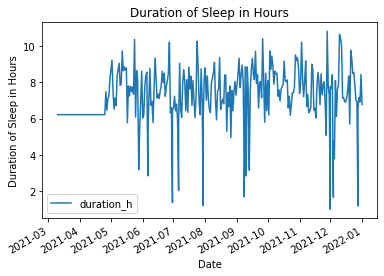

In [8]:
analysis['Date'] = pd.to_datetime(analysis['Date'])

#analysis['duration_h'] = analysis['duration'] / 3600000 #get duration in hours

fig = plt.figure(figsize = (6,6))
analysis.plot(x='Date', y='duration_h') 
plt.title('Duration of Sleep in Hours')
plt.xlabel('Date')
plt.ylabel('Duration of Sleep in Hours')
plt.show()

Interestingly, the user has a very irregular sleeping duration - this is most likely due to the fact that she works in a hospital with irregular shifts, both on weekdays and weekends. 

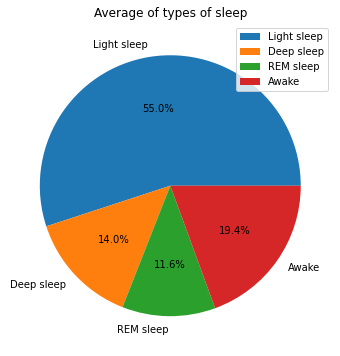

In [9]:
avgSleep = analysis[['levels.summary.light.minutes', 'levels.summary.deep.minutes', 'levels.summary.wake.minutes', 'levels.summary.rem.minutes']].mean()

fig = plt.figure(figsize = (6,6))
labels=['Light sleep', 'Deep sleep', 'REM sleep', 'Awake']
plt.pie(avgSleep, autopct='%1.1f%%', labels=labels)

plt.title('Average of types of sleep')
plt.legend()
plt.show()

According to FitBit, adults should spent between 50% and 60% of their sleep in **light** sleep; 10% - 25% in **deep** sleep,and lastly, 20% - 25% in **REM**. As the pie chart shows, the user barely spends the minimum amount in that important sleeping stage. 

As we already know, deep sleep is considered the stage to get the best quality sleep as it is the stage that when you wake up feeling refreshed in the morning, you’re likely to have experienced solid periods of deep sleep during the previous night. However, the user only spends the bare minimum in the deep stage. 

Source: https://blog.fitbit.com/sleep-stages-explained

Light and Deep Sleep stages vary a lot throughout the last months:

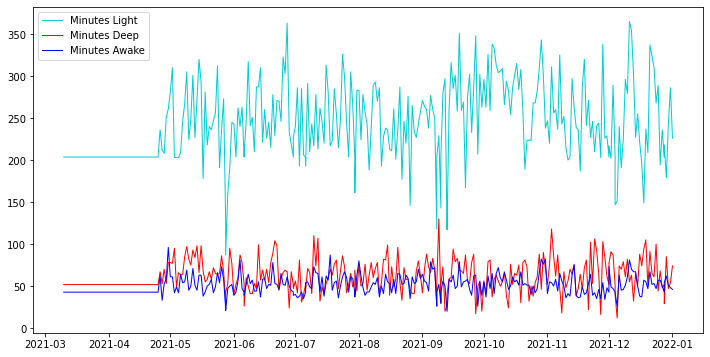

In [10]:
fig = plt.figure(figsize = (12,6))
plt.plot(analysis['Date'],analysis['levels.summary.light.minutes'], linestyle='-', 
         markersize=10, color='darkturquoise', label='Minutes Light', linewidth=1.0)
plt.plot(analysis['Date'],analysis['levels.summary.deep.minutes'], linestyle='-', 
         markersize=10, color='red', label='Minutes Deep', linewidth=1.0)
plt.plot(analysis['Date'],analysis['levels.summary.wake.minutes'], linestyle='-', 
         markersize=10, color='blue', label='Minutes Awake', linewidth=1.0)
plt.legend()

# Overall Score

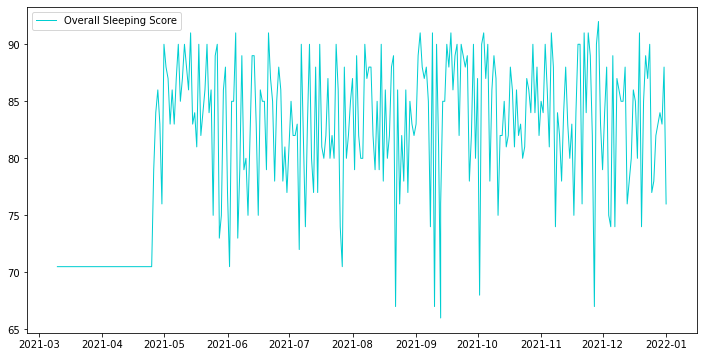

In [35]:
fig = plt.figure(figsize = (12,6))
plt.plot(analysis['Date'],analysis['overall_score'], linestyle='-', 
         markersize=10, color='darkturquoise', label='Overall Sleeping Score', linewidth=1.0)
plt.legend()

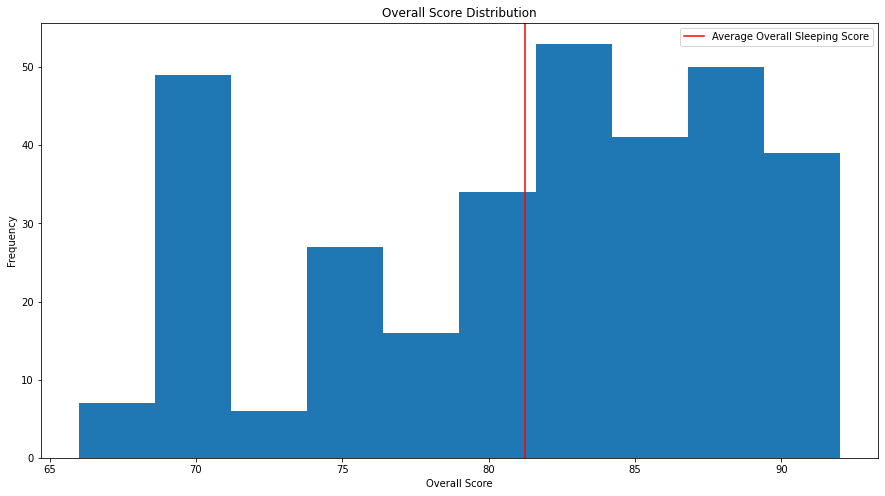

In [12]:
plt.figure(figsize=(15,8))
plt.hist(analysis.overall_score)
plt.axvline(analysis.overall_score.mean(), color='r', label='Average Overall Sleeping Score')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.title('Overall Score Distribution')
plt.legend()

The distribution of the Overall Score is slightly skewed to the left, with high frequency around a score of 70. Let's explore the data related to an overall score below 70:

In [13]:
show_score = analysis[analysis.overall_score < 70]
print(show_score)

          Date  overall_score  resting_heart_rate                startTime  \
176 2021-08-22           67.0                68.0  2021-08-22T03:45:00.000   
197 2021-09-10           67.0                63.0  2021-09-10T02:39:00.000   
198 2021-09-10           67.0                63.0  2021-09-09T22:40:00.000   
201 2021-09-13           66.0                64.0  2021-09-13T03:51:00.000   
202 2021-09-13           66.0                64.0  2021-09-12T22:48:00.000   
223 2021-10-02           68.0                66.0  2021-10-02T01:36:00.000   
281 2021-11-27           67.0                63.0  2021-11-27T02:23:00.000   

       duration  minutesAsleep  minutesAwake  timeInBed  efficiency  \
176  19080000.0          266.0          52.0      318.0        87.0   
197  13620000.0          198.0          29.0      227.0        93.0   
198  10260000.0          154.0          11.0      171.0        93.0   
201  11340000.0          169.0          20.0      189.0        93.0   
202  13380000.0     

As can be seen, the user wakes up a lot during the night. FitBit recognizes the user waking up as the end of the sleep cycle and starts a new sleep cycle as soon as the user goes to bed again. 

## Correlation

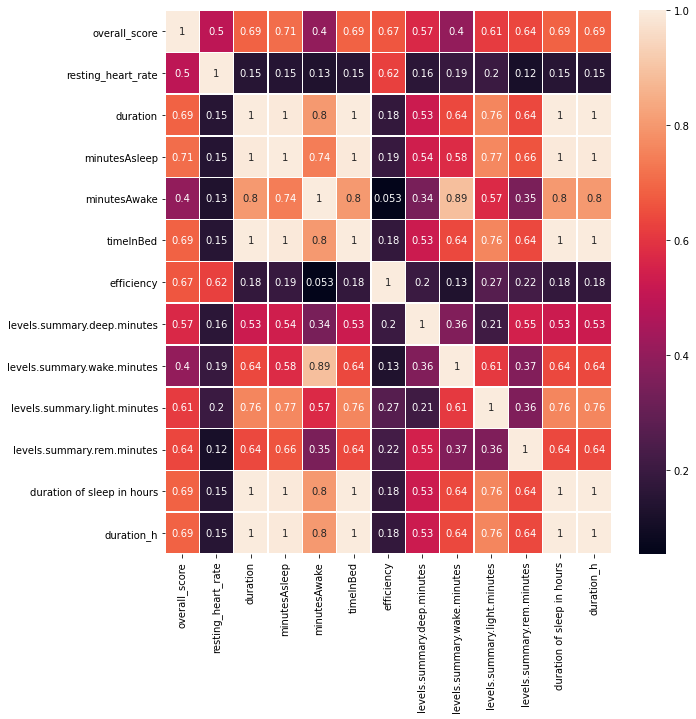

In [14]:
correlation_mat = analysis.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True, linewidths=.5, ax=ax)
plt.show()

#### Scatterplot

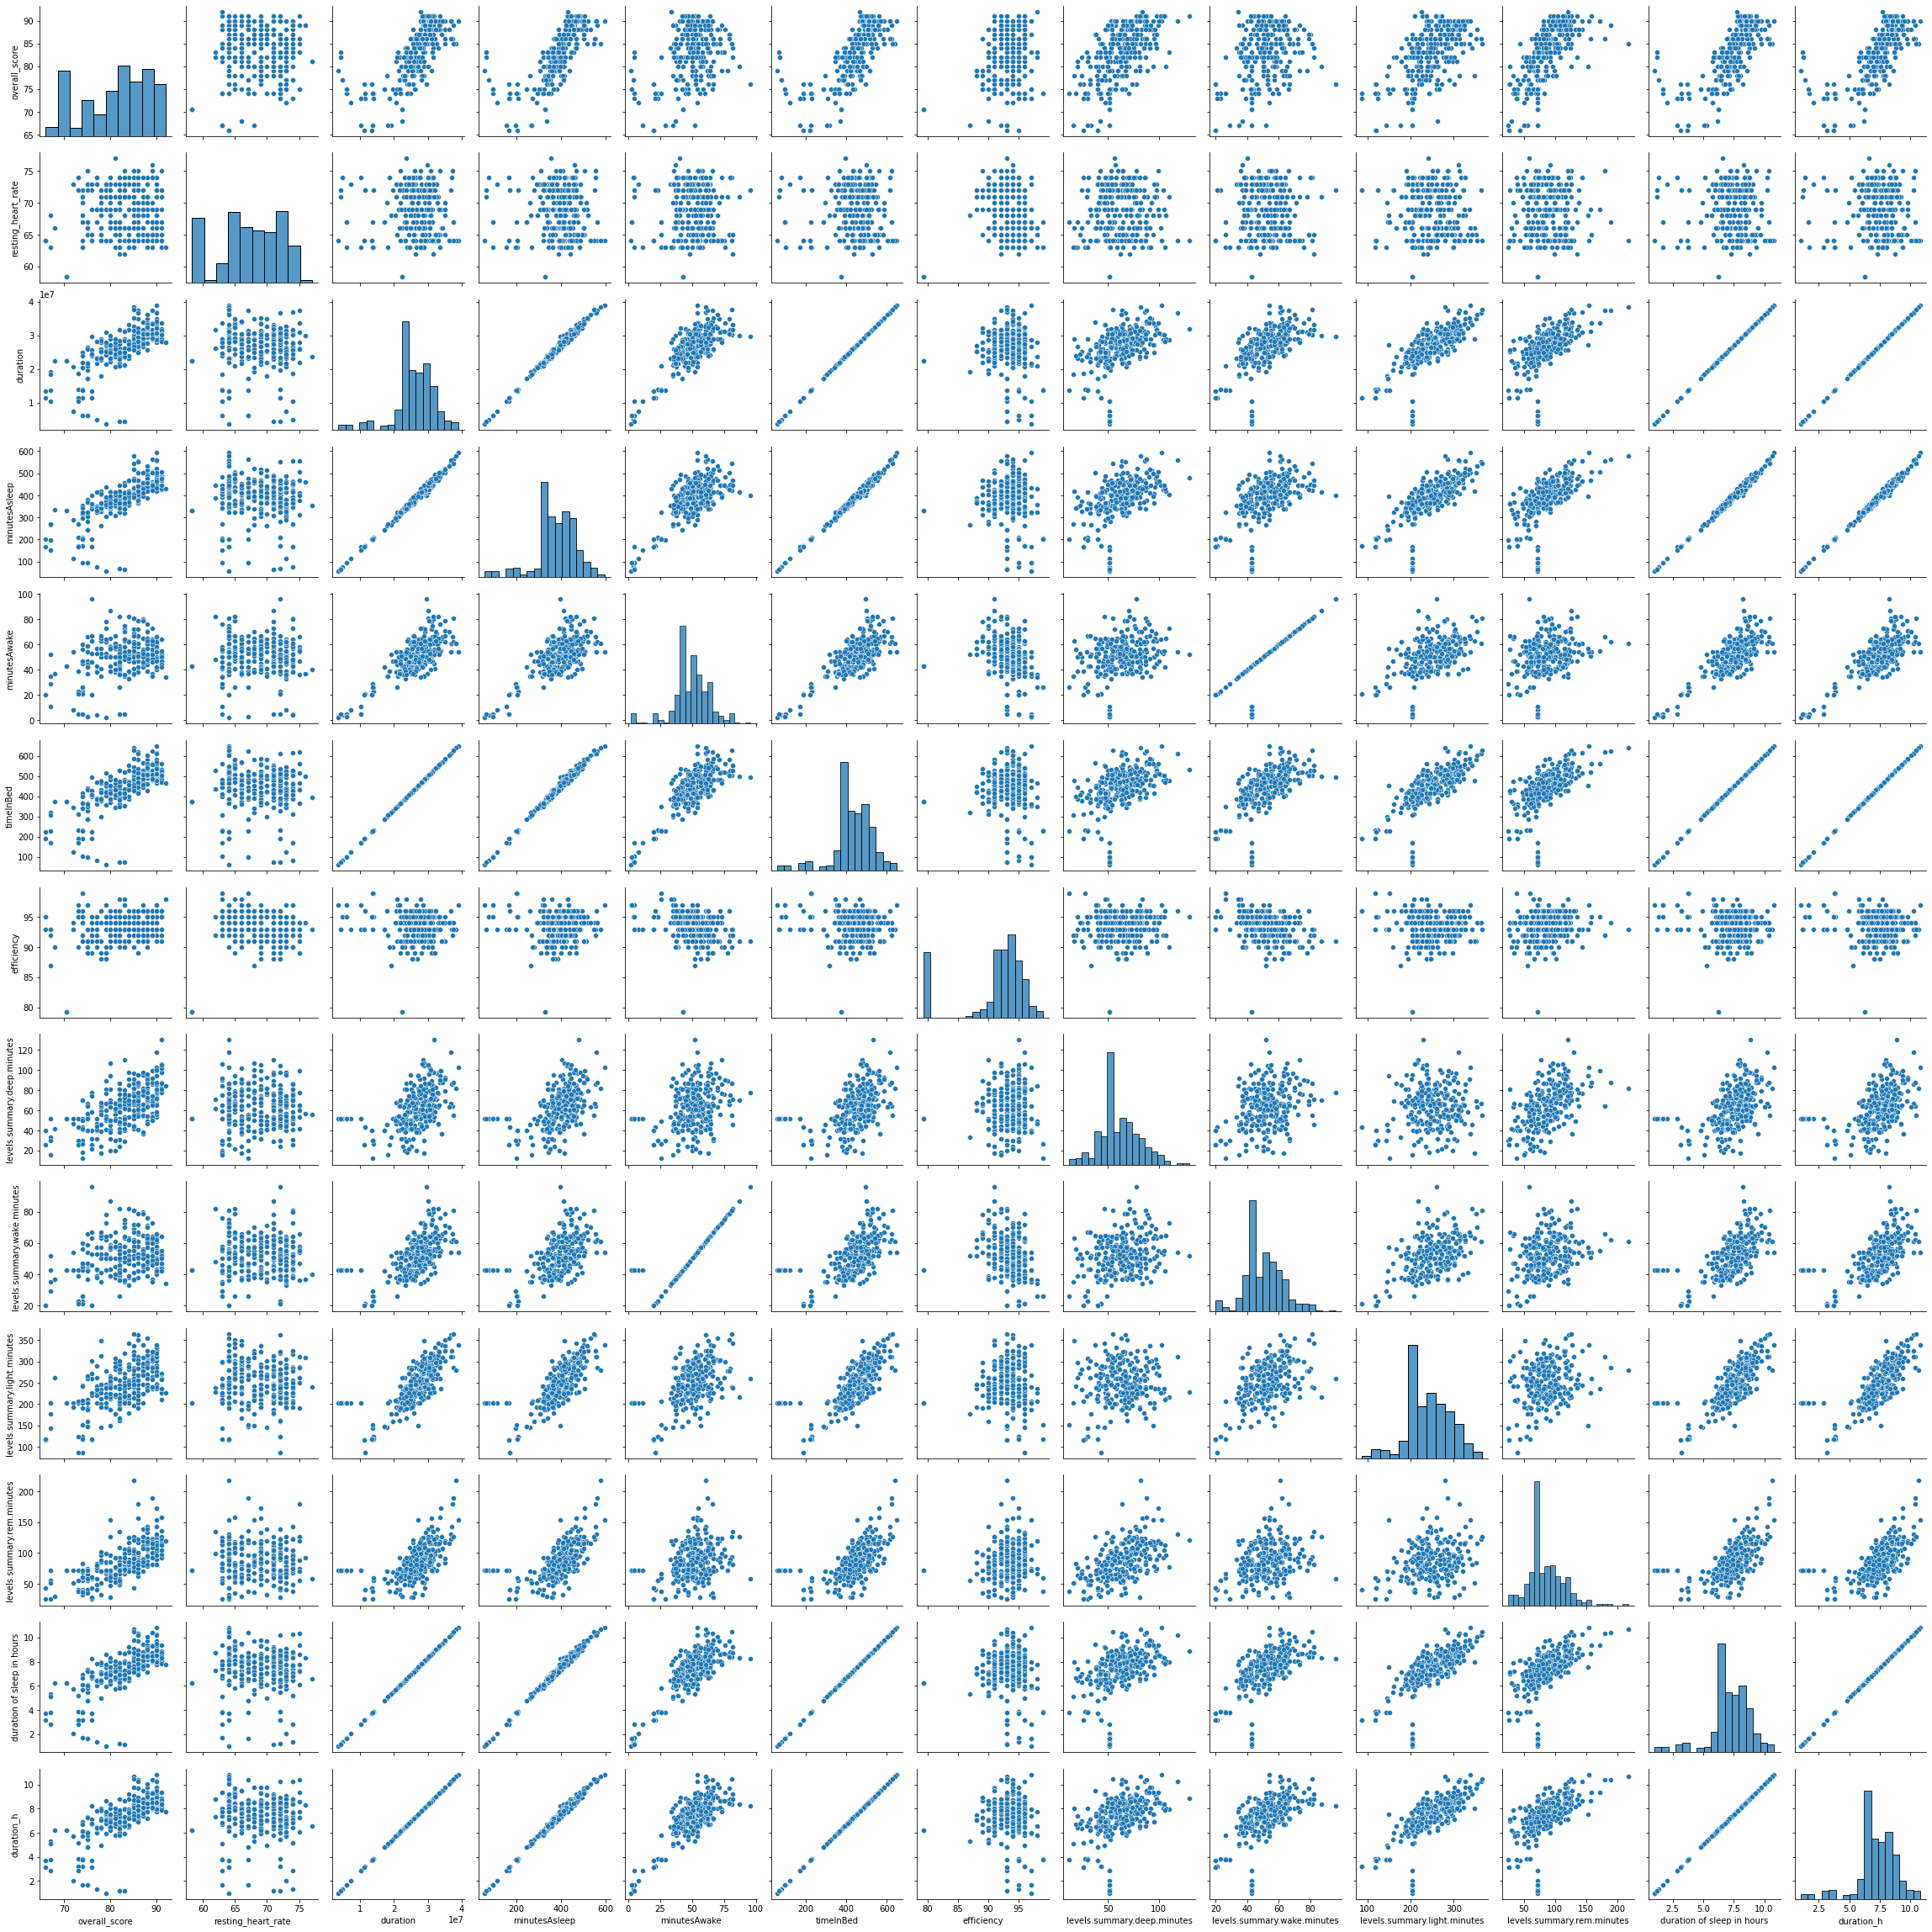

In [15]:
sns.pairplot(analysis)
plt.show() #using Matplotlib to show the plot

#### Pearson's R
pearsonr(Var1 = r, Var2 = p)
- The null hypothesis is that there is no association between variables, variables are independent.
- **Var1 (Correlation coefficient)**: Can range from -1 to +1
- **Var2 (p-Value)**: In many scientific disciplines, the error level is routinely set to 5% (i.e. a p value under .05) and you would call anything under that threshold “statistically significant”.

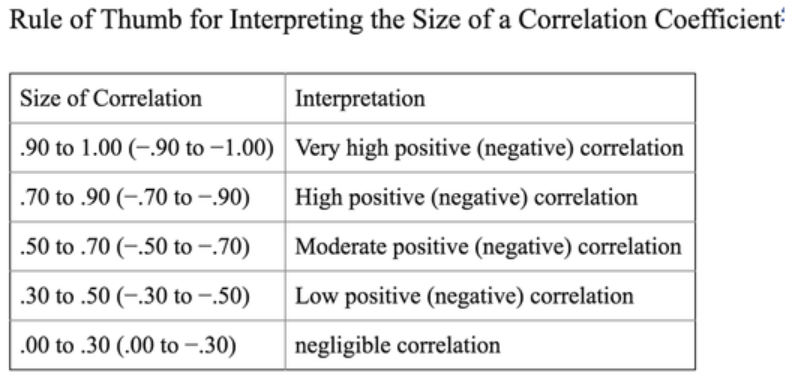

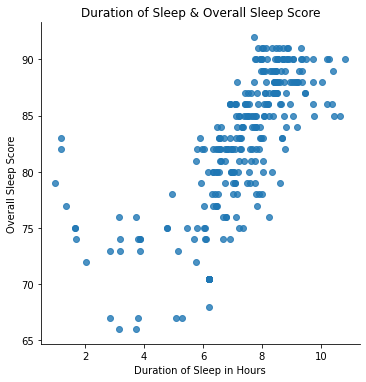

In [16]:
sns.lmplot(x='duration_h', y='overall_score', fit_reg=False, data=analysis) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Duration of Sleep in Hours') #use matplotlib to refine Seaborn plot
plt.ylabel('Overall Sleep Score')
plt.title('Duration of Sleep & Overall Sleep Score')
plt.show()

Duration of Sleep in Hours seem to have a strong positive relationship with the overall sleep score. In general, this is reasonable as the longer you sleep should lead to a better sleep. 

In [17]:
#calculate Pearson's r for this combination
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(analysis['overall_score'],analysis['duration_h']))

(0.6878778706297349, 1.8902459645903185e-46)


The output gives us two numbers: r = 0.69, and p = 1.89. 
Null Hypothesis: H0: there is no association between variables, variables are independent.

We can conclude the following:

* Overall Score & Duration of Sleep in Hours are moderatly positively correlated

# Machine Learning

## Simple Linear Regression

Let's do a simple linear regression. Duration is our independent variable (X), because the overall score (Y) depends on the duration.

In [18]:
from sklearn.model_selection import train_test_split #this is the function we need to split the data

x = analysis[['duration_h']] 
y = analysis['overall_score'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #splits the data into train (70%) and test (30%) data

In [19]:
lm = LinearRegression() #create a new (empty model)

lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY

In [20]:
y_test_p = lm.predict(x_test) #Generate the predictions and store them in y_test_p. USE ONLY THE TEST DATA HERE

In [21]:
r2_score(y_test, y_test_p) #this gives the model fit (R2) for the Y and predicted Y

0.4018323275373942

In [22]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

5.337017339292068

Two variables were used for analysis, Duration and the Overall Score - by splitting the data in training and test data and then running the Simple Linear Regression Model, the R2-Score is only 0.4; meaning that it would only correctly predict the overall score by 40%. 

In order to receive a higher predictability score, another model was used: 

## Multiple Linear Regression
The second model I used is Multiple Linear Regression to understand teh relationship between the independent variables and the Overall Score. This insight will then be used to make predictions about the overall score. 

In [23]:
X = analysis[['resting_heart_rate','duration','minutesAsleep','minutesAwake','timeInBed','efficiency','levels.summary.wake.minutes','levels.summary.light.minutes','levels.summary.rem.minutes','levels.summary.deep.minutes']] #to use sk-learn, we need to create lists of the two variables
y = analysis['overall_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model on the training data

LinearRegression()

In [24]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe

#### Evaluating the model

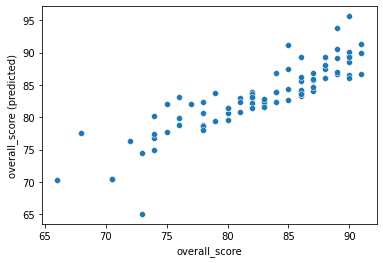

In [25]:
sns.scatterplot(x=y_test,y=y_test_p)
#plt.xlim(0, 1400000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
#plt.ylim(0, 1400000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
#plt.plot([0, 1], [0, 1], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('overall_score')
plt.ylabel('overall_score (predicted)')
plt.show()

In [26]:
r2_score(y_test, y_test_p) # r squared

0.8424567129423695

The *r<sup>2</sup>* score of 0.84 indicates that the model is able to predict around 84% of the variation. This is a very good prediction. 

In [27]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

2.7308859754629347

### Cross-Validation
As the dataset is relatively small, the Multiple Linear Regression Model could lead to over- or underfitting. Hence, I've decided to use Cross-Validation: This way, the dataset is being splitted into training and test data multiple times; and for each split, the test and training data will be differently. 

In the following, the data will be splitted 100 times and a r2-score will be predicted. Based on that data, a mean will be established to validate it against the r2-score from the previous model, MLR. 

In [28]:
from statistics import mean

In [29]:
X = analysis[['resting_heart_rate','duration','minutesAsleep','minutesAwake','timeInBed','efficiency','levels.summary.wake.minutes','levels.summary.light.minutes','levels.summary.rem.minutes','levels.summary.deep.minutes']] #to use sk-learn, we need to create lists of the two variables
y = analysis['overall_score']

scores = []
for i in range(100): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #split the data, store it into different variables
    X_train.head() #The train data

    lm = LinearRegression() #this creates a new LR model
    lm.fit(X_train, y_train) #this "fits" the model on the training data

    y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe
    
    if r2_score(y_test, y_test_p) > 0:
        scores.append(r2_score(y_test, y_test_p))
        
print(mean(scores))

0.8420231408497796


With all data points from the dataset, the "Overall score" ranges between 83 ad 85%, depending on what the model takes as new splits. 

In order to improve the score, irrelevant columns were delete. "Irrelevant" columns are defined as those with a correlation < 0.5 - more specifically, "levels.summary.wake.minutes" and "minutesAwake" were deleted.

In [30]:
X = analysis[['resting_heart_rate','duration','minutesAsleep','timeInBed','efficiency','levels.summary.light.minutes','levels.summary.rem.minutes','levels.summary.deep.minutes']] #to use sk-learn, we need to create lists of the two variables
y = analysis['overall_score']

scores = []
for i in range(100): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #split the data, store it into different variables
    X_train.head() #The train data

    lm = LinearRegression() #this creates a new LR model
    lm.fit(X_train, y_train) #this "fits" the model on the training data

    y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe
    
    if r2_score(y_test, y_test_p) > 0: #r2 score is validating data; my prediction is close to the actual data
        scores.append(r2_score(y_test, y_test_p))
        
print(mean(scores))

0.8469960670636323


The Cross-Validation achieved a mean of 84% as R-score. This means that the model predicts the overall score by 84% and is off in 16% of the cases. 

# Conclusion

In order to predict the overall score, Supervised Learning has been used.

As the Multiple Linear Regression performed similiarly, we can 
conlude that both models worked very well (around 84%). This is in comparison to the Simple Linear Regression which did not predict the overall score well. 

However, the data that has been used to predict the overall score excluded any activities that the user does daily. Hence, further research should take the all tracked data into consideration. Additionally, the continuous labels that have been used should be transformed into discrete labels by means of "binning" in order to apply other machine learning models, such as knn or Random Forest, incl accuracy, precision and recall. This could be done by working with ranges (e.g. a duration of 0-5 hours, 5.1 - 7 hours, and anything over 7 hours. 


#### Note

- The process of coming up with the final prediction was a "hell of a ride": 

    - First, the goal was to predict the resting heart based on based on the daily activity. However, this was disregarded as the resting heart improves or worsens over a period of time and is no direct result of e.g. calories burned.
    - Then, I wanted to predict how many hours the user needs to sleep in order to reach an overall sleep score of 90. This was then also disregarded because the algorithm would have said "sleep 24 hours" which is obviously not realistic. 
    - Finally, I decided then to re-create and predict the overall score that FitBit users can see daily. Eventually, this prediction algorithm works out very well. However, as the overall score is already an existing feature of the FitBit application, the study does not necessarily add any value; other than validating that the overall score has been predicted quite well. 
    
    
- Supervised learning is broken down into two categories: classification and regression. The latter was usable as the label is continuos. Those labels are to be identified as those whose values may take any number within a range. 
However, no classification has been able to be done, e.g. the Nearest Neighbors Regression as the label needs to be discrete.


- I am aware of the fact that my dataset is flawed to a certain extent; however, I was unable to find a solution:
    By looking at "startTime", one can see that the user wakes up during the night, and the FitBit watch then ends the current cycle. Once the user goes to bed again and falls asleep, the watch starts another cycle. Meaning that within those nights, two overall scores have been calculated that ended up being "bad" - this comes to no surprise as user's body has to reach a "good" quality sleep in order for the score to be high. 

In [ ]:
analysis.dtypes